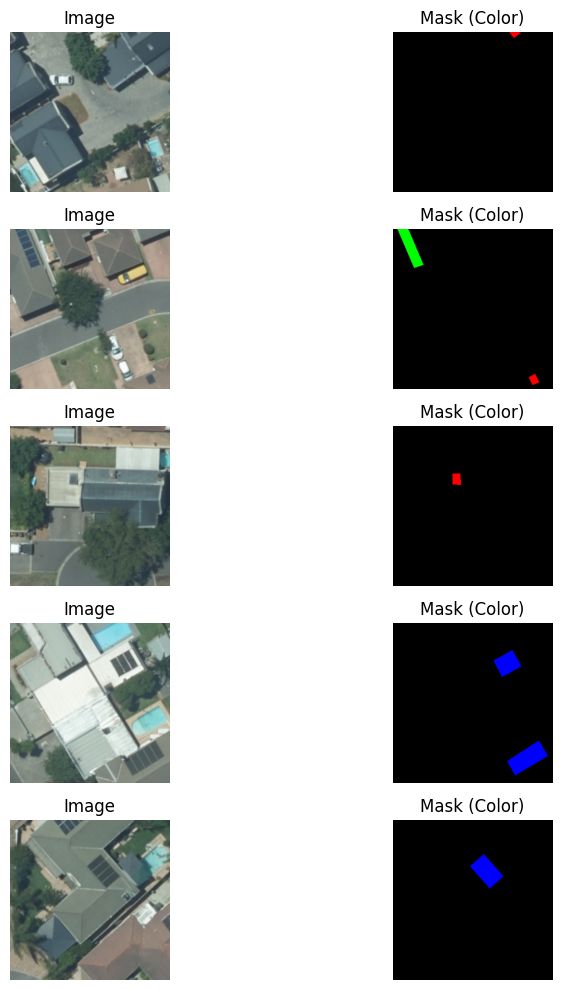

In [14]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Dataset folder
DATA_DIR = "/home/cmn60/cape_town_segmentation/output1k_new"

def display_image_mask_pairs(image_dir, mask_dir, num_samples=5):
    image_filenames = sorted(os.listdir(image_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    indices = random.sample(range(len(image_filenames)), min(num_samples, len(image_filenames)))

    # Define a colormap for 4 classes: 0 (background), 1, 2, 3
    cmap = ListedColormap([
        (0.0, 0.0, 0.0),       # class 0: black
        (0.0, 1.0, 0.0),       # class 1: green
        (1.0, 0.0, 0.0),       # class 2: red
        (0.0, 0.0, 1.0),       # class 3: blue
    ])

    plt.figure(figsize=(10, num_samples * 2))

    for i, idx in enumerate(indices):
        img_path = os.path.join(image_dir, image_filenames[idx])
        mask_path = os.path.join(mask_dir, mask_filenames[idx])

        # Load RGB image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load mask (grayscale with values 0,1,2,3)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Plot image
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis("off")

        # Plot mask with discrete colormap
        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(mask, cmap=cmap, vmin=0, vmax=3)
        plt.title("Mask (Color)")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Choose one of the splits to visualize:
display_image_mask_pairs(
    os.path.join(DATA_DIR, "train/images"),
    os.path.join(DATA_DIR, "train/masks"),
    num_samples=5
)

# To try val or test:
# display_image_mask_pairs(os.path.join(DATA_DIR, "val/images"), os.path.join(DATA_DIR, "val/masks"), num_samples=5)
# display_image_mask_pairs(os.path.join(DATA_DIR, "test/images"), os.path.join(DATA_DIR, "test/masks"), num_samples=5)